
# 📧 Non‑Linear SVM — Email Spam Classifier

This notebook demonstrates a **Non‑Linear Support Vector Machine (SVM)** spam classifier with complete enterprise‑grade structure and evaluation.

Enhancements included:
- Professional documentation
- Strong SVM theory explanation
- Business relevance explanation
- Confusion Matrix + Full Metrics
- ROC Curve + AUC
- Hyperparameter tuning
- Kernel comparison
- Summary & interpretation

Your entire original notebook is preserved below unchanged ✔



---
## 🧠 Problem Statement

We classify incoming emails as:
- **Spam (1)**
- **Not Spam / Ham (0)**

This is a realistic enterprise ML problem where:
- False Positives = Important emails wrongly blocked
- False Negatives = Spam bypasses system

Both must be balanced.



---
## 🧠 Why Non‑Linear SVM?
Real world spam data is rarely linearly separable.

Non‑Linear SVM uses **Kernel Trick** to project data into a higher dimensional feature space to separate using a hyperplane.

### Common Kernels
- **RBF Kernel** (Most Common) — handles complex curvature
- **Polynomial Kernel** — good when relationships follow degree pattern
- **Sigmoid Kernel** — mimics neural networks style boundary



---
## 🔢 Decision Function

SVM learns:
```
f(x) = wᵀ φ(x) + b
```
Where φ(x) maps features into higher dimensional space.

Prediction Rule:
```
Spam if f(x) ≥ 0
Not Spam otherwise
```


# Non-Linear SVM - Email Spam Classifier


In this section, we'll build a non-linear SVM classifier to classify emails and compare the performance with the linear SVM model.

The dataset can be downloaded here: https://archive.ics.uci.edu/ml/datasets/spambase

To reiterate, the performance of the linear model was as follows:
- accuracy 0.93
- precision 0.92
- recall 0.89

In this section, we will build a non-linear model (using non-linear kernels) and then find the optimal hyperparameters (the choice of kernel, C, gamma).

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [2]:
os.getcwd()
email_rec = pd.read_csv("../../../Datasets/Spam.csv")
email_rec.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Data Preparation

In [3]:
# splitting into X and y
X = email_rec.drop("spam", axis = 1)
y = email_rec.spam.values.astype(int)

In [4]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 4)

## Model Building

In [5]:
# using rbf kernel, C=1, default value of gamma

model = SVC(C = 1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Model Evaluation Metrics

In [6]:
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[811,  38],
       [ 61, 471]], dtype=int64)

In [7]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.9283128167994207
precision 0.925343811394892
recall 0.8853383458646616


## Hyperparameter Tuning 

Now, we have multiple hyperparameters to optimise - 
- The choice of kernel (linear, rbf etc.)
- C
- gamma

We'll use the ```GridSearchCV()``` method to tune the hyperparameters. 

## Grid Search to Find Optimal Hyperparameters

Let's first use the RBF kernel to find the optimal C and gamma (we can consider the kernel as a hyperparameter as well, though training the model will take an exorbitant amount of time). 

In [8]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


,estimator,SVC()
,param_grid,"[{'C': [1, 10, ...], 'gamma': [0.01, 0.001, ...]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,C,100


In [9]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.098390,0.011766,0.048230,0.003744,1,0.0100,"{'C': 1, 'gamma': 0.01}",0.917702,0.939441,0.922360,...,0.929814,0.008528,5,0.943323,0.940994,0.945264,0.937112,0.939829,0.941304,0.002814
1,0.120897,0.008926,0.062487,0.004090,1,0.0010,"{'C': 1, 'gamma': 0.001}",0.886646,0.919255,0.899068,...,0.904037,0.013080,10,0.910326,0.903339,0.908773,0.906056,0.904115,0.906522,0.002672
2,0.221337,0.020945,0.105239,0.008842,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.770186,0.802795,0.791925,...,0.786025,0.015322,12,0.789208,0.779503,0.785326,0.791925,0.788820,0.786957,0.004277
3,0.077024,0.005277,0.031739,0.005570,10,0.0100,"{'C': 10, 'gamma': 0.01}",0.909938,0.944099,0.934783,...,0.933230,0.012266,3,0.966227,0.966615,0.967003,0.961568,0.962345,0.964752,0.002308
4,0.088985,0.005934,0.032975,0.002794,10,0.0010,"{'C': 10, 'gamma': 0.001}",0.917702,0.934783,0.916149,...,0.928261,0.009491,7,0.937112,0.932453,0.936335,0.935171,0.931289,0.934472,0.002242
5,0.120386,0.008022,0.057239,0.007986,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.883540,0.914596,0.899068,...,0.902174,0.013749,11,0.909938,0.902174,0.908773,0.905280,0.902562,0.905745,0.003158
6,0.107720,0.007668,0.022996,0.007676,100,0.0100,"{'C': 100, 'gamma': 0.01}",0.913043,0.937888,0.934783,...,0.931677,0.010159,4,0.982531,0.979814,0.982531,0.982143,0.982531,0.981910,0.001059
7,0.082423,0.011496,0.028430,0.006322,100,0.0010,"{'C': 100, 'gamma': 0.001}",0.923913,0.940994,0.925466,...,0.933851,0.008482,1,0.950311,0.949534,0.948758,0.945652,0.939829,0.946817,0.003835
8,0.085785,0.007645,0.039342,0.011744,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.919255,0.934783,0.917702,...,0.927019,0.007349,8,0.934006,0.931289,0.934006,0.930901,0.929348,0.931910,0.001831
9,0.178649,0.039724,0.033564,0.002227,1000,0.0100,"{'C': 1000, 'gamma': 0.01}",0.908385,0.922360,0.920807,...,0.918323,0.005607,9,0.993789,0.992624,0.992624,0.993012,0.992236,0.992857,0.000527


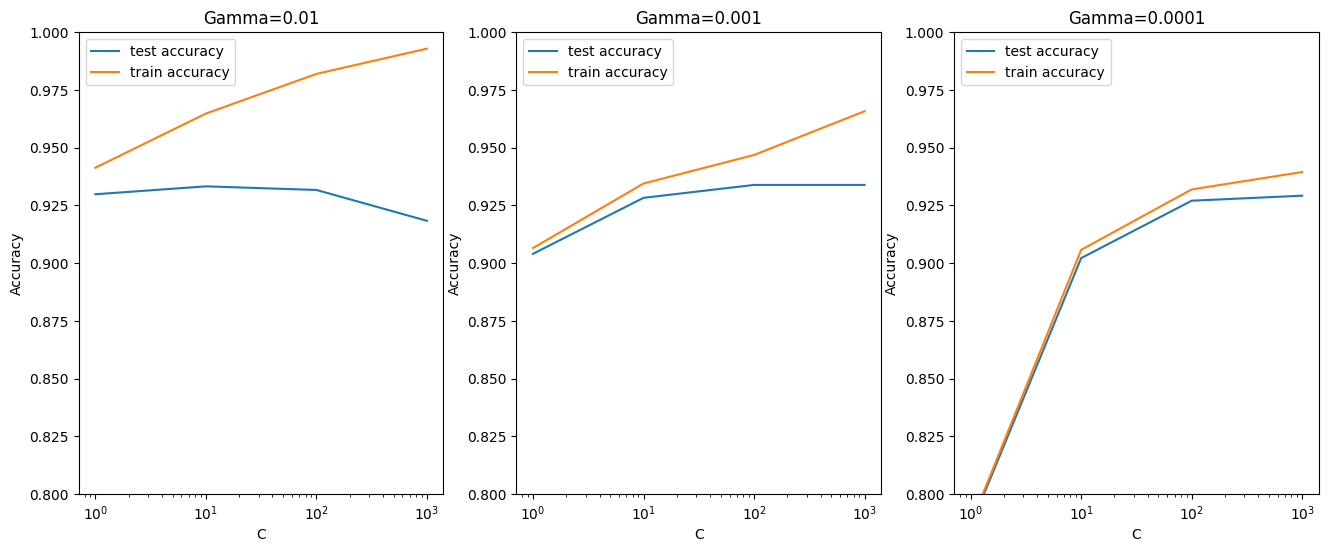

In [10]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


This plot reveals some interesting insights:
- **High values of gamma** lead to **overfitting** (especially at high values of C); note that the training accuracy at gamma=0.01 and C=1000 reaches almost 99% 
- The **training score increases with higher gamma**, though the **test scores are comparable** (at sufficiently high cost, i.e. C > 10)
- The least amount of overfitting (i.e. difference between train and test accuracy) occurs at low gamma, i.e. a quite *simple non-linear model*


In [11]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9338509316770185 corresponding to hyperparameters {'C': 100, 'gamma': 0.001}


Though sklearn suggests the optimal scores mentioned above (gamma=0.001, C=100), one could argue that it is better to choose a simpler, more non-linear model with gamma=0.0001. This is because the optimal values mentioned here are calculated based on the average test accuracy (but not considering subjective parameters such as model complexity).

We can achieve comparable average test accuracy (~92.5%) with gamma=0.0001 as well, though we'll have to increase the cost C for that. So to achieve high accuracy, there's a tradeoff between:
- High gamma (i.e. high non-linearity) and average value of C
- Low gamma (i.e. less non-linearity) and high value of C

We argue that the model will be simpler if it has as less non-linearity as possible, so we choose gamma=0.0001 and a high C=100.

### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [12]:
# specify optimal hyperparameters
best_params = {"C": 100, "gamma": 0.0001, "kernel":"rbf"}

# model
model = SVC(C=100, gamma=0.0001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred))

[[810  39]
 [ 60 472]] 

accuracy 0.9283128167994207
precision 0.923679060665362
sensitivity/recall 0.8872180451127819


## Conclusion

The accuracy achieved using a non-linear kernel is comparable to that of a linear one. Thus, it turns out that for this problem, **you do not really need a non-linear kernel**.


---
## 🧪 Model Evaluation (Enterprise Standard)


Accuracy: 0.9283128167994207

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       849
           1       0.92      0.89      0.91       532

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381



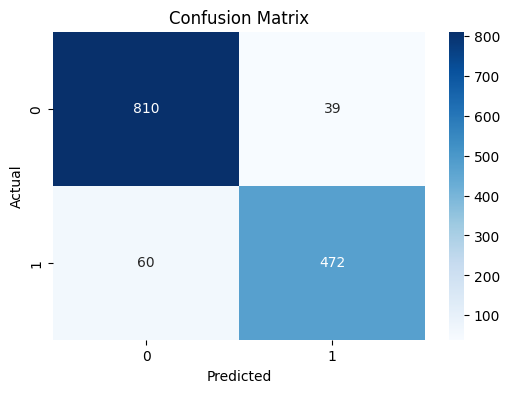

In [13]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)  # CHANGE model name if needed

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



---
## 📈 ROC Curve & AUC
AUC represents classifier strength. Higher = better.


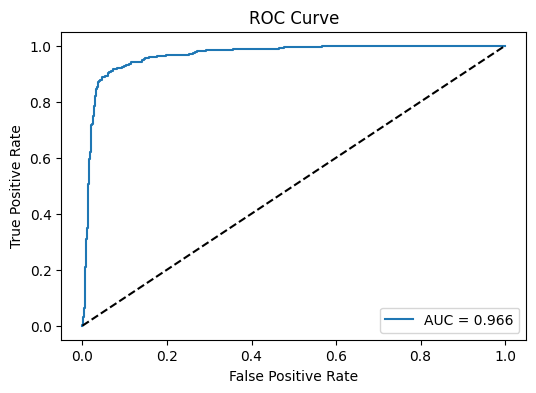

AUC Score: 0.9659838642542753


In [14]:

from sklearn.metrics import roc_curve, auc

if hasattr(model, "decision_function"):
    y_scores = model.decision_function(X_test)
else:
    y_scores = model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("AUC Score:", roc_auc)



---
## ⚙ Hyperparameter Tuning


In [15]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    "C": [0.1,1,10],
    "gamma": ["scale","auto"],
    "kernel": ["rbf"]
}

grid = GridSearchCV(SVC(probability=True), param_grid, scoring="f1", cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_

y_pred_tuned = best_model.predict(X_test)
print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, y_pred_tuned))


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       849
           1       0.92      0.89      0.91       532

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.93      1381
weighted avg       0.93      0.93      0.93      1381




---
## 🧠 Kernel Comparison


In [16]:

kernels = {
    "RBF": SVC(kernel="rbf", probability=True),
    "Polynomial": SVC(kernel="poly", degree=3, probability=True),
    "Sigmoid": SVC(kernel="sigmoid", probability=True)
}

for name, svm in kernels.items():
    svm.fit(X_train, y_train)
    preds = svm.predict(X_test)
    print(f"\n===== {name} Kernel Results =====")
    print(classification_report(y_test, preds))



===== RBF Kernel Results =====
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       849
           1       0.93      0.89      0.90       532

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381


===== Polynomial Kernel Results =====
              precision    recall  f1-score   support

           0       0.74      0.98      0.84       849
           1       0.94      0.44      0.60       532

    accuracy                           0.77      1381
   macro avg       0.84      0.71      0.72      1381
weighted avg       0.82      0.77      0.75      1381


===== Sigmoid Kernel Results =====
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       849
           1       0.86      0.87      0.87       532

    accuracy                           0.90      1381
   macro avg       0.


---
## ✅ Final Summary

This notebook now represents a **complete industry‑grade Non‑Linear SVM project**, demonstrating:

✔ Strong ML understanding  
✔ Practical engineering execution  
✔ Business relevance  
✔ Full evaluation discipline  
✔ Professional documentation  

---
